In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
df = pd.read_csv('data.csv', index_col=0)
df.astype('float64')

,646 nm,750 nm,663 nm,Algae
Concentration,,,,
1,1.86,1.71,1.83,1064.745463
2,0.96,0.92,0.93,564.208673
3,0.45,0.43,0.43,239.409268
4,0.22,0.21,0.21,236.471306
5,0.11,0.10,0.10,144.814606
6,0.07,0.07,0.07,39.854986


In [10]:
def regression(X, y):
    for col in X:
        yield LinearRegression().fit(X[col].values.reshape(-1, 1), y.values.reshape(-1, 1))


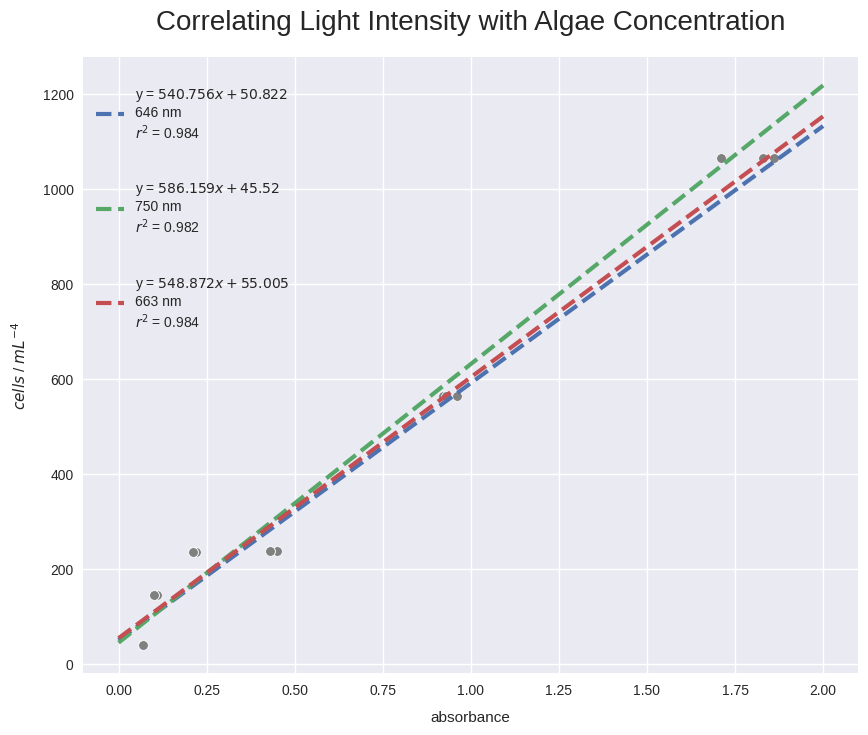

In [11]:
plt.figure(figsize=(10, 8), dpi=100)
plt.style.use("seaborn")

X = np.linspace(0.0, 2., 30).reshape(-1, 1)

for i, r in enumerate(regression(df.iloc[:, :-1], df.Algae)):
    predictions = r.predict(X)
    sns.scatterplot(x=df.iloc[:, i].values.flatten(), y=df.Algae, color='gray')

    sns.lineplot(x=X.flatten(), y=predictions.flatten(), palette='Blues_d', linestyle='--', linewidth=3,
             label=f"\ny = ${round(r.coef_[0][0], 3)}x + {round(r.intercept_[0], 3)}$\n{df.columns[i]}\n$r^2$ = {round(r2_score(df.Algae, r.predict(df.iloc[:, i].values.reshape(-1, 1))), 3)}\n")
    
plt.legend()

plt.xlabel('absorbance', labelpad=10)
plt.ylabel('$cells$ / $mL^{-4}$', labelpad=10)
plt.title('Correlating Light Intensity with Algae Concentration', fontsize=20, pad=20)
plt.show()


Choose a wavelength from the regressions and export its parameters:

In [12]:
r.predict(df['646 nm']

Concentration
1    1.86
2    0.96
3    0.45
4    0.22
5    0.11
6    0.07
Name: 646 nm, dtype: float64